## Семинар 3 "Определение ключевых точек лица"

ФИО: Галицкий Игорь Олегович

# Подготовительная задача 1

Сделать из линейной регрессии nn.sequental двухслойную сеть

In [1]:
%matplotlib inline
from __future__ import print_function, division
import os
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch
from torch.autograd import Variable

In [2]:

D_in, D_out = 784, 10


model = torch.nn.Sequential(
          torch.nn.Linear(D_in, 100), torch.nn.Sigmoid(), torch.nn.Linear(100, D_out)
        )

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


# Подготовительная задача 2

Используя структуру сети Sequental в pytorch реализовать и обучить классификатор цифр из MNIST
(повторить первый и второй пункты из прошлого задания )

In [3]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np

%matplotlib inline
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [4]:
model = torch.nn.Sequential(
          torch.nn.Linear(784, 100), torch.nn.Sigmoid(), torch.nn.Linear(100, 100), torch.nn.Sigmoid(), torch.nn.Linear(100, 10)
        )

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

losts = []
for X, y in train_loader:
    X = X.view(X.size(0), -1)
    X = Variable(X)
    y = Variable(y, requires_grad=False)
    
    y_pred = model(X)
    
    loss = loss_fn(y_pred, y)
    losts.append(loss.data[0]/32) 
    model.zero_grad()
    
    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

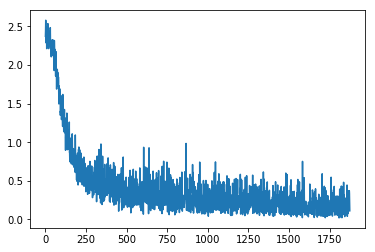

In [5]:
plt.plot(losts)
plt.show()

In [6]:
answer =[]
answer = np.array(answer)

y_ans = []
y_ans = np.array(y_ans)


for T,y_hat in test_loader:
    
    T = T.view(T.size(0), -1)
    T = Variable(T)
    
    y_hat = y_hat.numpy()
    
     
    ans = model(T)
    
    ans = ans.data.numpy()
    ans = ans.argmax(axis=1)
 
    answer = np.hstack((answer,ans))
    y_ans = np.hstack((y_ans,y_hat))

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(answer, y_ans)

0.95309999999999995

# ReLu

In [8]:
model = torch.nn.Sequential(
          torch.nn.Linear(784, 100), torch.nn.ReLU(), torch.nn.Linear(100, 100), torch.nn.ReLU(), torch.nn.Linear(100, 10)
        )

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

losts = []
for X, y in train_loader:
    X = X.view(X.size(0), -1)
    X = Variable(X)
    y = Variable(y, requires_grad=False)
    
    y_pred = model(X)
    
    loss = loss_fn(y_pred, y)
    losts.append(loss.data[0]/32) 
    model.zero_grad()
    
    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

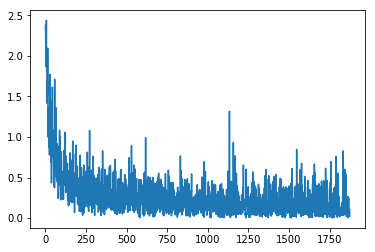

In [9]:
plt.plot(losts)
plt.show()

In [10]:
answer =[]
answer = np.array(answer)

y_ans = []
y_ans = np.array(y_ans)


for T,y_hat in test_loader:
    
    T = T.view(T.size(0), -1)
    T = Variable(T)
    
    y_hat = y_hat.numpy()
    
     
    ans = model(T)
    
    ans = ans.data.numpy()
    ans = ans.argmax(axis=1)
 
    answer = np.hstack((answer,ans))
    y_ans = np.hstack((y_ans,y_hat))

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(answer, y_ans)

0.96099999999999997

Для ReLu сходится побыстрее

# Задание

Используя датасет из архива решите задачу регрессии для поиска 68-ми ключевых точек лица. 

Для обучения и валидации используйте изображения и разметку из папок train и test соответственно.

Попробуйте сети глубины 1 и 2 и разные активации (ELU, RELU и sigmoid).

In [12]:
landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

Image name: 109.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[  7.  41.]
 [  8.  51.]
 [ 10.  60.]
 [ 13.  70.]]


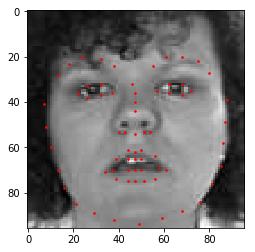

In [13]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

n = 100
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('dataset/train/', img_name)),
               landmarks)
plt.show()

In [14]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        #image = image.transpose((0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

In [15]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [16]:
train_landmarks_path = 'dataset/train/face_landmarks.csv'
train_path = 'dataset/train/'
test_landmarks_path = 'dataset/test/face_landmarks.csv'
test_path = 'dataset/test'

In [22]:
train = FaceLandmarksDataset(csv_file=train_landmarks_path,
                                           root_dir= train_path, transform=transforms.Compose([
                                               ToTensor()
                                           ])
                                           )

for i in range(len(train)):
    sample = train[i]

    print(i, sample['image'].float().size(), sample['landmarks'].float().size())
 
    if i == 3:
        plt.show()

        break

6221
0 torch.Size([96, 96]) torch.Size([68, 2])
1 torch.Size([96, 96]) torch.Size([68, 2])
2 torch.Size([96, 96]) torch.Size([68, 2])
3 torch.Size([96, 96]) torch.Size([68, 2])


In [18]:
dataloader = DataLoader(train, batch_size=40,
                        shuffle=True, num_workers=4)

# Sigmoida


In [25]:
D_in, H, D_out = 96*96, 330, 136
import tqdm

num_epoch = 10
def predict(model, x_val):
    
    x = Variable(x_val, requires_grad=False)
    output = model.forward(x)
    return output.data.numpy()


model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.Sigmoid(),
          torch.nn.Linear(H, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=True)

learning_rate = 0.01
error = []
error_train = []
optimizer =  torch.optim.SGD(model.parameters(), lr=learning_rate)
for t in tqdm.tqdm(range(num_epoch)):
    
    for T in dataloader:
        X = T['image'].view(T['image'].size(0), -1).float()
        Y = T['landmarks'].view(T['landmarks'].size(0), -1).float()
        x = Variable(X, requires_grad=False)
        y = Variable(Y, requires_grad=False)
        
        y_pred = model.forward(x)

        loss =  loss_fn(y_pred, y)
        error.append(loss.data[0])
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
    error_train.append(np.array(error).mean())



  0%|          | 0/10 [00:00<?, ?it/s]


 10%|█         | 1/10 [00:09<01:23,  9.25s/it]

 20%|██        | 2/10 [00:17<01:11,  8.91s/it]

 30%|███       | 3/10 [00:25<01:00,  8.67s/it]

 40%|████      | 4/10 [00:33<00:50,  8.48s/it]

 50%|█████     | 5/10 [00:41<00:41,  8.36s/it]

 60%|██████    | 6/10 [00:49<00:33,  8.27s/it]

 70%|███████   | 7/10 [00:57<00:24,  8.18s/it]

 80%|████████  | 8/10 [01:05<00:16,  8.10s/it]

 90%|█████████ | 9/10 [01:13<00:08,  8.04s/it]

100%|██████████| 10/10 [01:21<00:00,  8.01s/it]



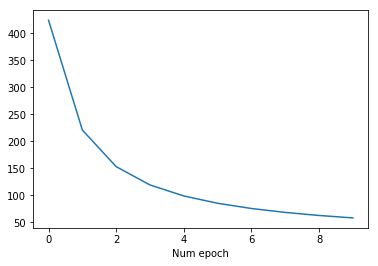

In [26]:
plt.figure()
plt.plot(error_train)
plt.xlabel('Num epoch')

# RELU

In [ ]:
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=True)

learning_rate = 0.01
error = []
error_train = []
optimizer =  torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in tqdm.tqdm(range(num_epoch)):
    for T in dataloader:
        X = T['image'].view(T['image'].size(0), -1).float()
        Y = T['landmarks'].view(T['landmarks'].size(0), -1).float()
        x = Variable(X, requires_grad=False)
        y = Variable(Y, requires_grad=False)
        
        y_pred = model.forward(x)

        loss =  loss_fn(y_pred, y)
        error.append(loss.data[0])
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    
    error_train.append(np.array(error).mean())

 50%|█████     | 5/10 [01:15<01:18, 15.67s/it]

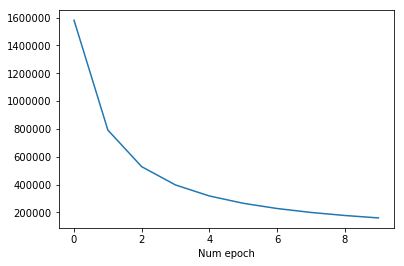

In [24]:
plt.figure()
plt.plot(error_train)
plt.xlabel('Num epoch')

# Test

In [25]:
test = FaceLandmarksDataset(csv_file=test_landmarks_path,
                                               root_dir=test_path, transform=transforms.Compose([
                                                   ToTensor()
                                               ])
                                               )

In [26]:

landmarks_frame = pd.read_csv(test_landmarks_path)

n = 60

landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)


def plt_test(i):   
    for k in range(i):
        landmarks = landmarks_frame.ix[k, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        plt.figure()
        a = test[k]['image'].float()
        a = a.view(-1)
        f = predict(model, a)
        f_1 = f[::2]
        f_2 = f[1::2]
        img_name = landmarks_frame.ix[k, 0]
        plt.figure()
        
        ax = plt.subplot(1, i, k + 1)
        ax.set_title('Sample #{}'.format(k))
        plt.imshow(io.imread(os.path.join(test_path, img_name)), cmap='gray')
        plt.scatter(f_1, f_2, s=10, marker='.', c='b')
        plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.show()

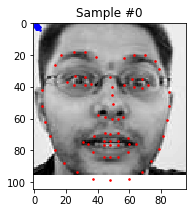

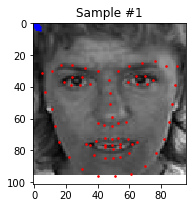

In [27]:
plt_test(2)

# Error on test 

In [ ]:
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.Sigmoid(),
          torch.nn.Linear(H, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=True)

learning_rate = 0.01
error = []
error_train = []
optimizer =  torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in tqdm.tqdm(range(num_epoch)):
    for T in dataloader:
        X = T['image'].view(T['image'].size(0), -1).float()
        Y = T['landmarks'].view(T['landmarks'].size(0), -1).float()
        x = Variable(X, requires_grad=False)
        y = Variable(Y, requires_grad=False)
        
        y_pred = model.forward(x)

        loss =  loss_fn(y_pred, y)
        error.append(loss.data[0])
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    
    error_train.append(np.array(error).mean())